Analysis of the climate variables from ERA5 data

In [2]:
#Import packages
import os
import earthpy as et
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
from matplotlib.ticker import MaxNLocator

In [3]:
#Set path to where the data is
CITY_COUNTRY = 'LINQING_CHINA'

City_Lat = 36.84556
City_Lon = 115.7117

os.chdir(os.path.join(et.io.HOME, 'Documents', 'Python_Scripts', 'PROJECT', 'ERA5', CITY_COUNTRY))

#file
filename = 'linqing_2002_2020.nc'

#open file
clim_ds = xr.open_dataset(filename)

#bounds to look at
#Area to look at will be the city centre +/- 0.25 degs?
min_lat = City_Lat - 0.25
max_lat = City_Lat + 0.25
min_lon = City_Lon - 0.25
max_lon = City_Lon + 0.25

In [4]:
#add in date column to the variables
clim_ds['date'] = clim_ds['time']

temp_ds = clim_ds.sel(latitude =(clim_ds.latitude > min_lat) & (clim_ds.latitude < max_lat), method = 'nearest')

subset_clim_ds = temp_ds.sel(longitude =(temp_ds.longitude >min_lon) & (temp_ds.longitude < max_lon), method = 'nearest')

#send to dataframe
clim_df = subset_clim_ds.to_dataframe()

In [65]:
#get averages: precip, 2m air temp
#then plot                         
#Extract the months and years from the date
date2 = pd.DatetimeIndex(clim_df['date'])
clim_df['date2']= date2
clim_df['month'] = date2.month
clim_df['year'] = date2.year

#Add in the relative humidity
def calc_rh(x):
    a = 17.67
    b = 243.5
    rh = 100* np.exp(a*x["d2m"]/(b+x["d2m"]))/ np.exp(a*x["t2m"]/(b+x["t2m"]))
    return rh

clim_df["rh"] = calc_rh(clim_df)

#group by month/ year to get means
g_mon = clim_df.groupby(["month"])
monthly_averages = g_mon.aggregate({"tp":np.mean, "t2m":np.mean, "rh":np.mean, "skt":np.mean})

g_yr = clim_df.groupby(["year"])
yearly_averages = g_yr.aggregate({"tp":np.mean, "t2m":np.mean, "rh":np.mean, "skt":np.mean})

#remove 2020 from the annual averages as data for Dec 2020 not available. Will skew 2020
yearly_averages.drop(yearly_averages.tail(1).index,inplace=True) # drop last row

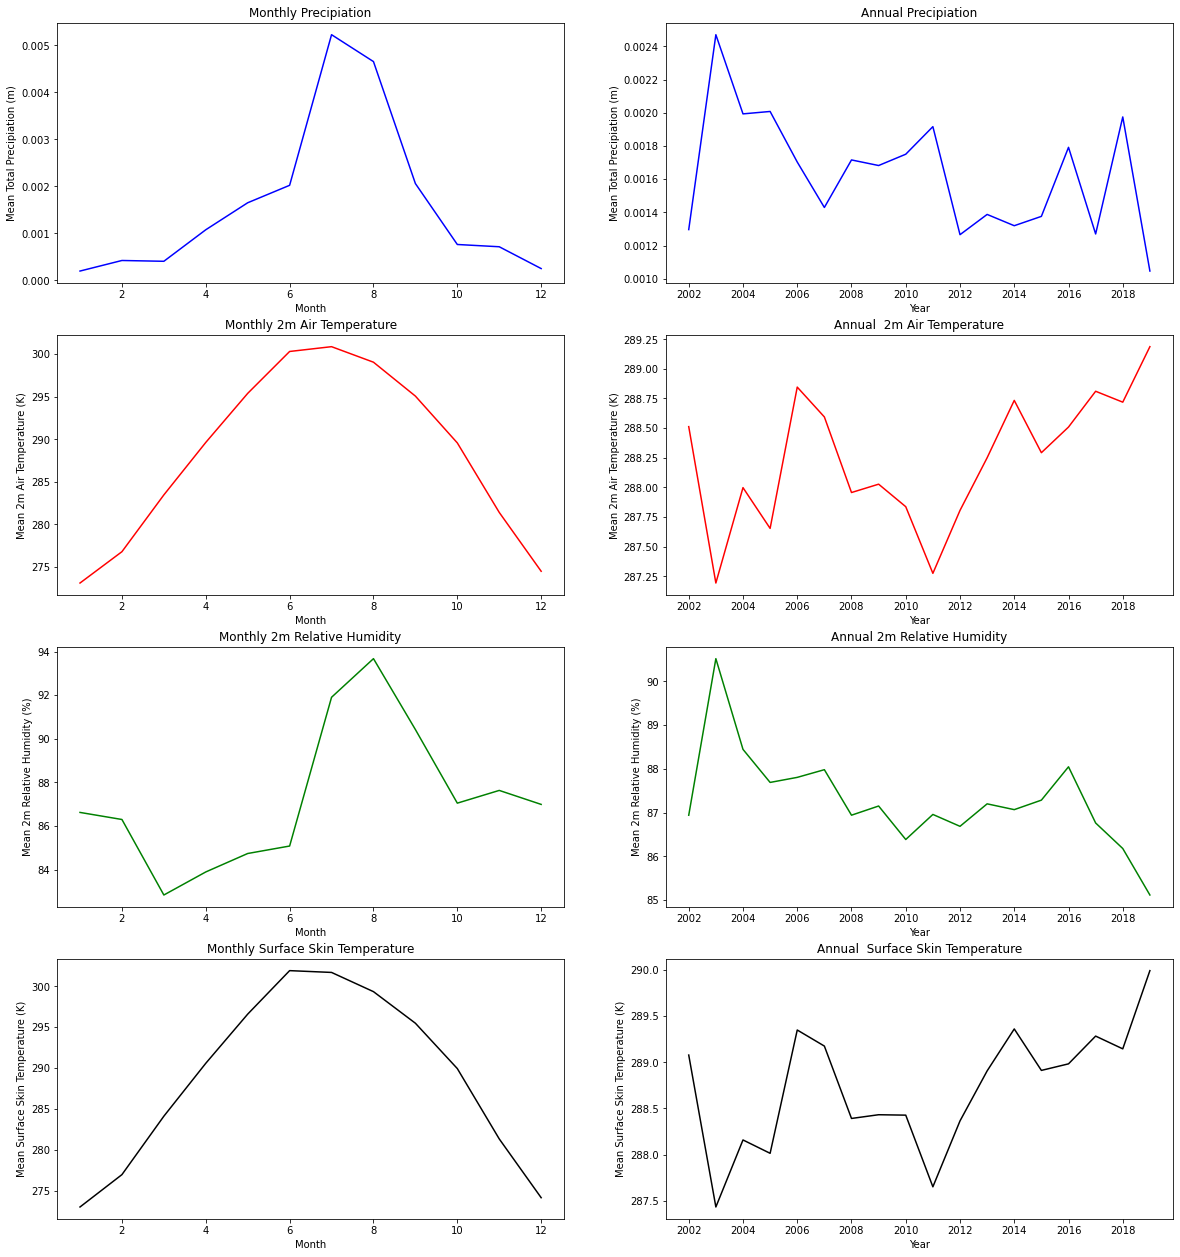

In [72]:
#plot monthly and yearly precip, air temp 2m, relative humidity, skin temperature

fig, axes = plt.subplots(nrows = 4,ncols = 2, figsize=(20, 22))

axes[0,0].plot(monthly_averages.tp, 'b')
axes[0,0].set_title('Monthly Precipiation')
axes[0,0].set(xlabel = 'Month', ylabel = 'Mean Total Precipiation (m)')

axes[0,1].plot(yearly_averages.tp, 'b')
axes[0,1].set_title('Annual Precipiation')
axes[0,1].set(xlabel = 'Year', ylabel = 'Mean Total Precipiation (m)')

axes[1,0].plot(monthly_averages.t2m, 'r')
axes[1,0].set_title('Monthly 2m Air Temperature')
axes[1,0].set(xlabel = 'Month', ylabel = 'Mean 2m Air Temperature (K)')

axes[1,1].plot(yearly_averages.t2m, 'r')
axes[1,1].set_title('Annual  2m Air Temperature')
axes[1,1].set(xlabel = 'Year', ylabel = 'Mean 2m Air Temperature (K)')

axes[2,0].plot(monthly_averages.rh, 'g')
axes[2,0].set_title('Monthly 2m Relative Humidity')
axes[2,0].set(xlabel = 'Month', ylabel = 'Mean 2m Relative Humidity (%)')

axes[2,1].plot(yearly_averages.rh, 'g')
axes[2,1].set_title('Annual 2m Relative Humidity')
axes[2,1].set(xlabel = 'Year', ylabel = 'Mean 2m Relative Humidity (%)')

axes[3,0].plot(monthly_averages.skt, 'k')
axes[3,0].set_title('Monthly Surface Skin Temperature')
axes[3,0].set(xlabel = 'Month', ylabel = 'Mean Surface Skin Temperature (K)')

axes[3,1].plot(yearly_averages.skt, 'k')
axes[3,1].set_title('Annual  Surface Skin Temperature')
axes[3,1].set(xlabel = 'Year', ylabel = 'Mean Surface Skin Temperature (K)')


xa = axes[0,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) #make sure the y axis sticks to integers as is by year
xa = axes[1,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) 
xa = axes[2,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) 
xa = axes[3,1].get_xaxis()
xa.set_major_locator(MaxNLocator(integer=True)) 

#save the plot as a png
plt.savefig('era5_clim_trends.png')

In [44]:
clim_df

d2m         t2m         skt        tp  \
latitude longitude time                                                       
36.0     115.0     2002-01-01  267.053345  275.695312  275.351868  0.000588   
                   2002-02-01  268.727234  280.398804  280.607666  0.000023   
                   2002-03-01  273.337006  285.546631  286.166107  0.000379   
                   2002-04-01  277.394867  289.057159  290.192627  0.000716   
                   2002-05-01  286.576721  293.315247  294.119781  0.002654   
...                                   ...         ...         ...       ...   
                   2020-05-01  283.635468  296.418274  298.089203  0.001089   
                   2020-06-01  289.575867  300.363129  302.051758  0.002419   
                   2020-07-01  293.417023  299.796631  300.997162  0.001749   
                   2020-08-01  295.932251  299.361786  299.464111  0.007048   
                   2020-09-01  287.192566  296.784698  297.523376  0.000244   

                                    date      date2  month  year  
latitude longitude time                                           
36.0     115.0     2002-01-01 2002-01-01 2002-01-01      1  2002  
                   2002-02-01 2002-02-01 2002-02-01      2  2002  
                   2002-03-01 2002-03-01 2002-03-01      3  2002  
                   2002-04-01 2002-04-01 2002-04-01      4  2002  
                   2002-05-01 2002-05-01 2002-05-01      5  2002  
...                                  ...        ...    ...   ...  
                   2020-05-01 2020-05-01 2020-05-01      5  2020  
                   2020-06-01 2020-06-01 2020-06-01      6  2020  
                   2020-07-01 2020-07-01 2020-07-01      7  2020  
                   2020-08-01 2020-08-01 2020-08-01      8  2020  
                   2020-09-01 2020-09-01 2020-09-01      9  2020  

[99225 rows x 8 columns]